In [1]:
import os
import sys
import warnings
import logging

module_path = os.path.abspath('../src')
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from forecaster.utils.preprocessor import Preprocessor

warnings.filterwarnings('ignore')
logging.getLogger('prophet').setLevel(logging.WARNING)

%matplotlib inline
%load_ext autoreload
%autoreload

Randomized Search Results

In [2]:
# top 5 models
linear_res_rs = pd.read_csv('../results/randomized_search/linear_results.csv')
lgb_res_rs = pd.read_csv('../results/randomized_search/lgb_results.csv')
prophet_res_rs = pd.read_csv('../results/randomized_search/prophet_results.csv')
linear_res_rs.append(lgb_res_rs.append(prophet_res_rs)).sort_values(by='rmse_mean').head()

,Unnamed: 0,parameter,rmse_mean,mse_mean,mae_mean,mape_mean,rmse_std,mse_std,mae_std,mape_std,model
6,6,"{'alpha': 0.22870325566094915, 'cyclic_feature...",290.757966,99994.038580,223.047480,0.118832,126.076890,100764.898698,83.686015,0.054434,Linear
34,34,"{'alpha': 0.2983659280678823, 'cyclic_feature_...",291.574790,100624.735941,223.719470,0.118933,126.707719,101333.738383,84.079023,0.054275,Linear
1,1,"{'alpha': 0.3345687780986316, 'cyclic_feature_...",291.922349,100867.364472,224.149521,0.119038,126.869274,101469.428373,84.039016,0.054070,Linear
36,36,"{'alpha': 0.33959397063994484, 'cyclic_feature...",291.971248,100903.231167,224.209619,0.119055,126.898921,101494.581543,84.037362,0.054045,Linear
39,39,"{'alpha': 0.4595826525376368, 'cyclic_feature_...",292.594080,101368.065765,225.224233,0.119284,127.306573,101753.963889,83.868995,0.053215,Linear


In [3]:
# for 50 iterations
pd.read_csv('../results/randomized_search/time.csv')

,Unnamed: 0,model,time,time (min),time (h)
0,0,Linear,10560.667270,176.011121,2.933519
1,1,Prophet,5199.300286,86.655005,1.444250
2,2,LGB,20557.318775,342.621980,5.710366


Bayesian Search Results

In [8]:
res_bs = pd.read_csv('../results/bayesian/bayesian_results.csv')
res_bs.sort_values(by='rmse').head()

,Unnamed: 0,parameter,rmse,model
85,85,"{'alpha': 0.22421736808593695, 'cyclic_feature...",290.736776,Linear
81,81,"{'alpha': 0.2292482283010931, 'cyclic_feature_...",290.762158,Linear
99,99,"{'alpha': 0.21904679041825842, 'cyclic_feature...",290.766988,Linear
86,86,"{'alpha': 0.23238347511521268, 'cyclic_feature...",290.778153,Linear
96,96,"{'alpha': 0.23377914438220562, 'cyclic_feature...",290.788609,Linear


In [9]:
pd.read_csv('../results/bayesian/bayesian_time.csv')

,Unnamed: 0,model,count,time,time (min),time (h)
0,0,LGB,13,4578.893442,76.314891,1.271915
1,1,Linear,81,18444.587012,307.409784,5.123496
2,2,Prophet,6,621.490617,10.358177,0.172636


Test forecaster

Percentage of outlier: 3.15377532228361%


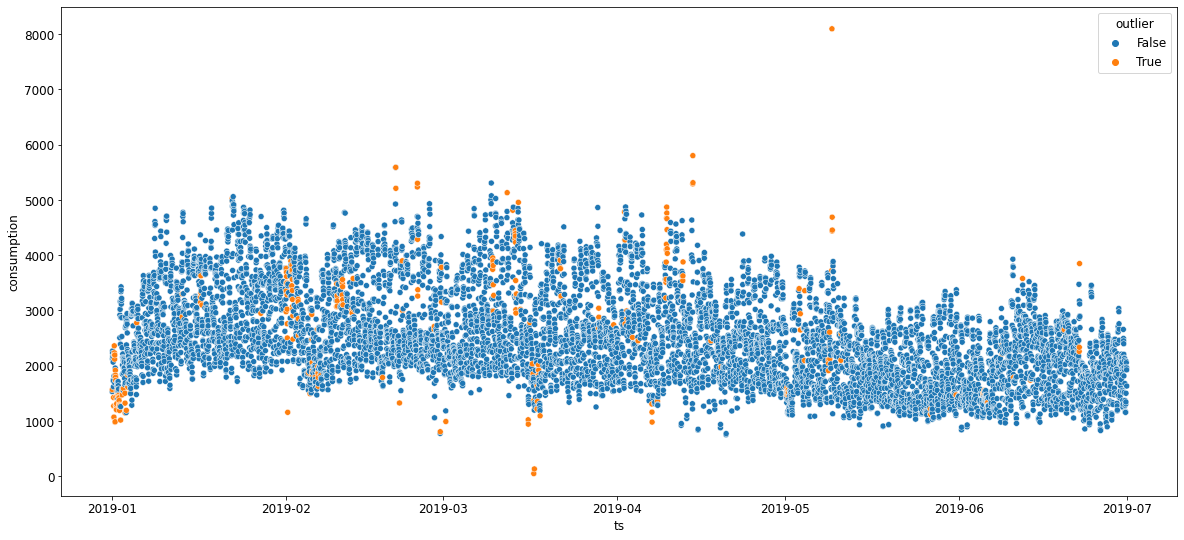

In [2]:
df_raw_scm = pd.read_csv('../data/scm_july16_feb20.csv', parse_dates=True, index_col='timestamp')
df_scm = df_raw_scm.loc['2019-01':'2019-06'].copy()
pp = Preprocessor(resample_freq='30min', na_th='2h', agg='mean')
df_scm_pp = pp.fit(df_scm).transform(df_scm)

In [3]:
from forecaster import AutomatedForecasting
af_bayesian = AutomatedForecasting(models=['Linear'], method='bayesian')
af_bayesian.fit(df_scm_pp)

Linear                                                
{'alpha': 0.060781093043904715, 'cyclic_feature_encoding': 'sincos'}
Linear                                                                             
{'alpha': 0.0017859393209856333, 'cyclic_feature_encoding': 'onehot'}              
Linear                                                                             
{'alpha': 0.0012823786784012213, 'cyclic_feature_encoding': 'onehot'}              
Linear                                                                             
{'alpha': 0.008328196590579116, 'cyclic_feature_encoding': 'onehot'}               
Linear                                                                             
{'alpha': 0.08883021636288554, 'cyclic_feature_encoding': 'sincos'}                
Linear                                                                             
{'alpha': 0.4740274314137255, 'cyclic_feature_encoding': 'onehot'}                 
Linear                              

AutomatedForecasting(models=['Linear'])

In [5]:
af_bayesian.df_res

,parameter,error,model,model1,model2
0,"{'alpha': 0.060781093043904715, 'cyclic_featur...",290.820152,Linear,None,None
1,"{'alpha': 0.0017859393209856333, 'cyclic_featu...",323.113056,Linear,None,None
2,"{'alpha': 0.0012823786784012213, 'cyclic_featu...",327.925925,Linear,None,None
3,"{'alpha': 0.008328196590579116, 'cyclic_featur...",295.616622,Linear,None,None
4,"{'alpha': 0.08883021636288554, 'cyclic_feature...",292.843497,Linear,None,None
5,"{'alpha': 0.4740274314137255, 'cyclic_feature_...",289.585498,Linear,None,None
6,"{'alpha': 0.2460069427834335, 'cyclic_feature_...",292.863102,Linear,None,None
7,"{'alpha': 0.18754374227511905, 'cyclic_feature...",293.607729,Linear,None,None
8,"{'alpha': 0.4975352614538573, 'cyclic_feature_...",289.834796,Linear,None,None
9,"{'alpha': 0.16651422411785946, 'cyclic_feature...",293.100521,Linear,None,None
